In [19]:
import pandas as pd


In [20]:
data = pd.read_csv('Book1.csv', encoding = "ISO-8859-1")

In [21]:
data.head()

,text,place
0,Meditation and mindfulness tips for coping wit...,Pune
1,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,Gandhinagar
2,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,Bidhan Nagar
3,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,Maharashtra
4,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,Bokaro Steel City


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44179 entries, 0 to 44178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44179 non-null  object
 1   place   44162 non-null  object
dtypes: object(2)
memory usage: 690.4+ KB


In [23]:
import sweetviz as sv

report = sv.analyze(data)
report.show_html('report.html', open_browser  = True)

                                             |                                             | [  0%]   00:00 ->…

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


###### 44179  ROWS ; 189    DUPLICATES ; 16.2   MBRAM ; 2      FEATURES ; 0      CATEGORICAL ; 0      NUMERICAL ; 2      TEXT ; 

In [24]:
#drop duplicates

data.drop_duplicates()

,text,place
0,Meditation and mindfulness tips for coping wit...,Pune
1,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,Gandhinagar
2,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,Bidhan Nagar
3,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,Maharashtra
4,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,Bokaro Steel City
...,...,...
44174,#HardAreaAllowance for #HCWs: During #Corona p...,New Delhi
44175,@ZeeNews @sudhirchaudhary But who did not had ...,Faridabad
44176,No Surprises https://t.co/6RWca4U7mP,Orissa
44177,Coronavirus lockdown: Industries hit hard in S...,Noida


In [25]:
data.shape

(44179, 2)

In [26]:
data.dropna()

,text,place
0,Meditation and mindfulness tips for coping wit...,Pune
1,Contribute to INDIA FIGHTS CORONA @ Gandhinaga...,Gandhinagar
2,@DelhiPolice @DCPEastDelhi @msisodia @AamAadmi...,Bidhan Nagar
3,#SSC_UFM_MAT_KARONA\n#Corona is slow poison #U...,Maharashtra
4,https://t.co/P7eQiq8tFa Mata Di \nDoston ise #...,Bokaro Steel City
...,...,...
44174,#HardAreaAllowance for #HCWs: During #Corona p...,New Delhi
44175,@ZeeNews @sudhirchaudhary But who did not had ...,Faridabad
44176,No Surprises https://t.co/6RWca4U7mP,Orissa
44177,Coronavirus lockdown: Industries hit hard in S...,Noida


In [27]:
import re

In [28]:
#clean text
#im gonna remove urls, mentions, and special characters

def clean(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'@', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'&amp', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    
    return text

data['text'] = data['text'].apply(clean)

data

,text,place
0,meditation and mindfulness tips for coping wit...,Pune
1,contribute to india fights corona gandhinagar...,Gandhinagar
2,sir please send a team immediately to sa...,Bidhan Nagar
3,ssc ufm mat karonacorona is slow poison ufm is...,Maharashtra
4,mata di doston ise corona ke tarah faila do b...,Bokaro Steel City
...,...,...
44174,hardareaallowance for hcws during corona pand...,New Delhi
44175,but who did not had corona or other illness ...,Faridabad
44176,no surprises,Orissa
44177,coronavirus lockdown industries hit hard in s...,Noida


In [29]:
import numpy as np

In [30]:
from nltk.corpus import stopwords

In [31]:
#removing stopwords

stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
data['text'] = data['text'].apply(remove_stopwords)
data.head()

,text,place
0,meditation mindfulness tips coping corona viru...,Pune
1,contribute india fights corona gandhinagar g...,Gandhinagar
2,sir please send team immediately sanitiz...,Bidhan Nagar
3,ssc ufm mat karonacorona slow poison ufm insta...,Maharashtra
4,mata di doston ise corona ke tarah faila bhai...,Bokaro Steel City


In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

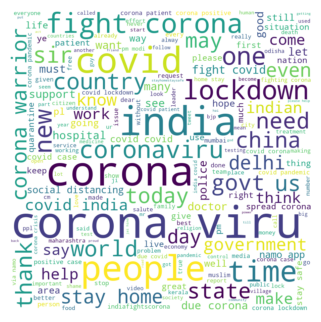

In [15]:
allWords = ' '.join([twts  for twts in data['text']])
wordCloud = WordCloud(width = 900, height = 900,background_color = 'white',stopwords = set(STOPWORDS), random_state = 21, max_words = 200).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [33]:
data.to_csv('Cleaned data.csv')

In [34]:
import seaborn as sb

#sb.countplot(data['place'])

In [35]:
df = pd.read_csv('senti.csv', encoding= "utf-8" , error_bad_lines=False)

In [36]:
#Target encoding, colum added "senti_encoded"

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['sentiment'])

df['senti_encoded'] = le.transform(df['sentiment'])
df.head()

,Unnamed: 0,sentiment,text,senti_encoded
0,3204,sad,agree the poor in india are treated badly thei...,3
1,1431,joy,if only i could have spent the with this cutie...,2
2,654,joy,will nature conservation remain a priority in ...,2
3,2530,sad,coronavirus disappearing in italy show this to...,3
4,2296,sad,uk records lowest daily virus death toll since...,3


In [37]:
def clean_data(dataframe):
#replace URL of a text
    df['text'] = df['text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')

clean_data(df)
print(df['text']);

0       agree the poor in india are treated badly thei...
1       if only i could have spent the with this cutie...
2       will nature conservation remain a priority in ...
3       coronavirus disappearing in italy show this to...
4       uk records lowest daily virus death toll since...
                              ...                        
3085    today at 02 30pm a 54 year old bangladeshi mal...
3086    corona virus i implore that you cease activity...
3087    issa date once lockdown ends inshaallah (and c...
3088    the death toll due to covid 19 rose to 31 in j...
3089    the rates are become barrier for poor people t...
Name: text, Length: 3090, dtype: object


In [38]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [39]:
#removing stopwordss
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text

    
df['text'] = df['text'].apply(remove_stopwords)
df.head()

,Unnamed: 0,sentiment,text,senti_encoded
0,3204,sad,agree poor india treated badly poors seek livi...,3
1,1431,joy,could spent cutie vc sakshi__s n g h coast cro...,2
2,654,joy,nature conservation remain priority post coron...,2
3,2530,sad,"coronavirus disappearing italy show ""intellect...",3
4,2296,sad,uk records lowest daily virus death toll since...,3


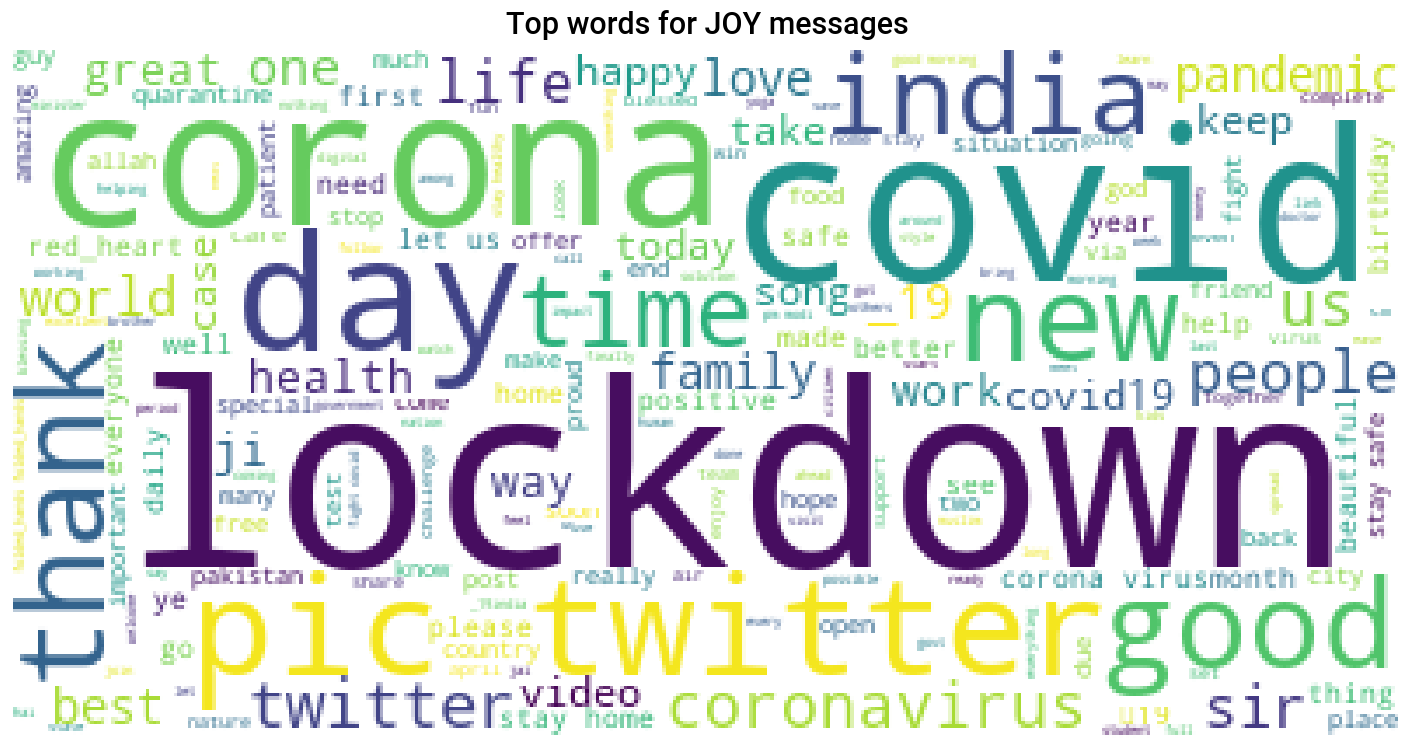

In [40]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in df.loc[df['sentiment'] == 'joy', 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for JOY messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

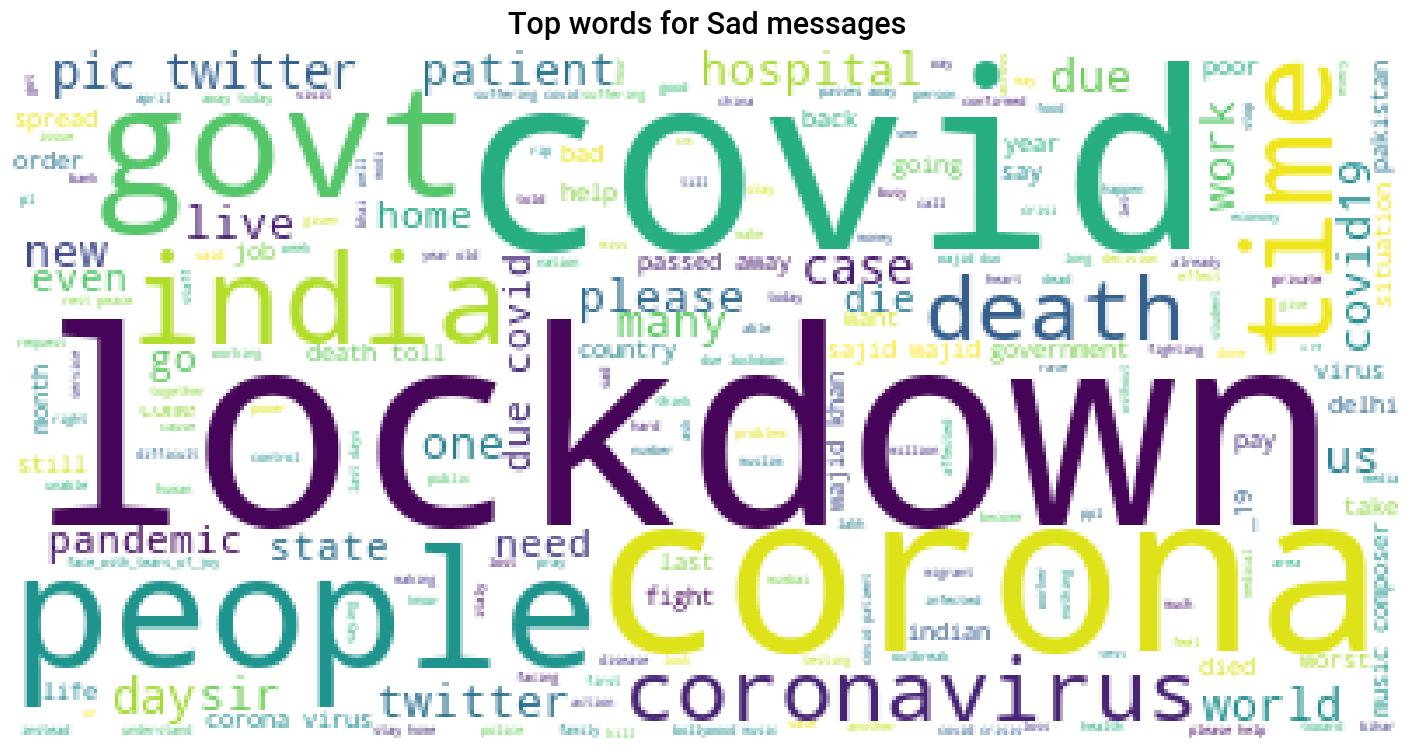

In [41]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in df.loc[df['sentiment'] == 'sad', 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for Sad messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

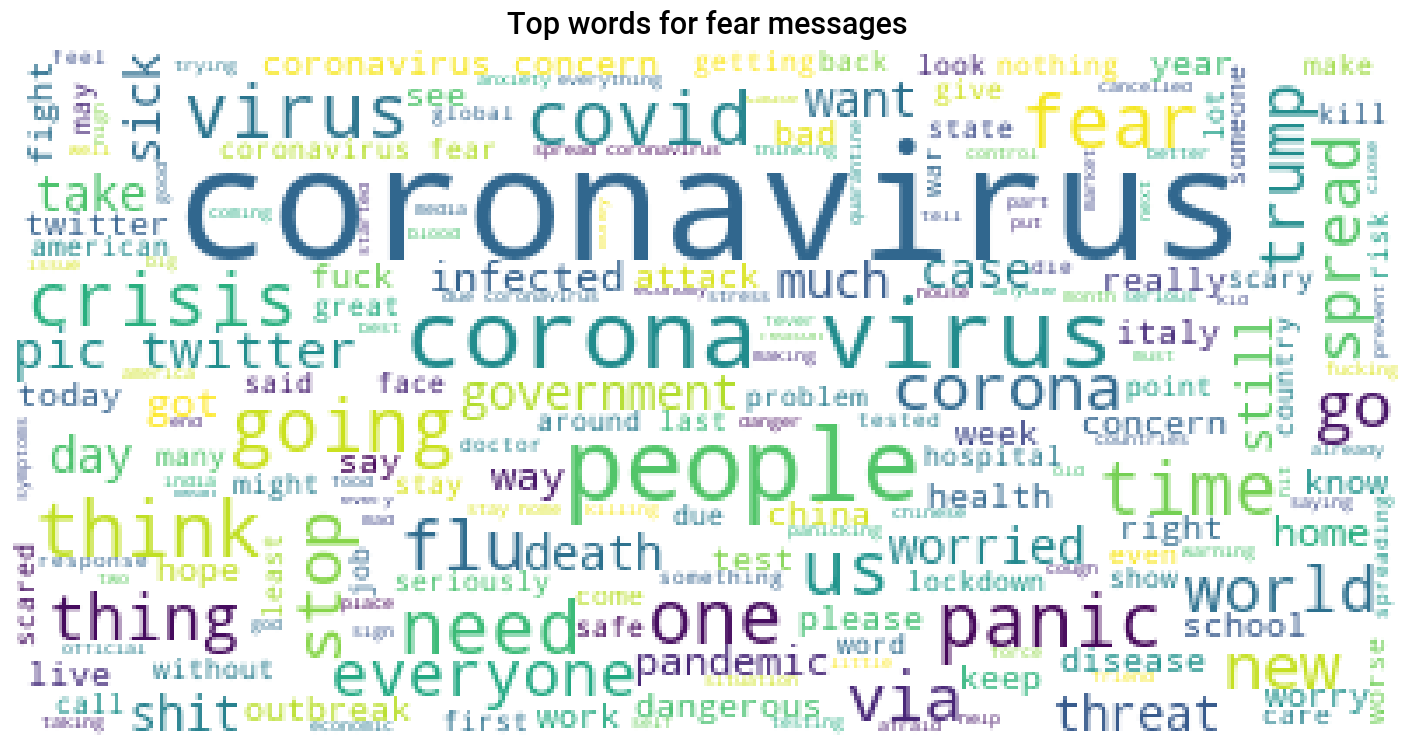

In [42]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in df.loc[df['sentiment'] == 'fear', 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for fear messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

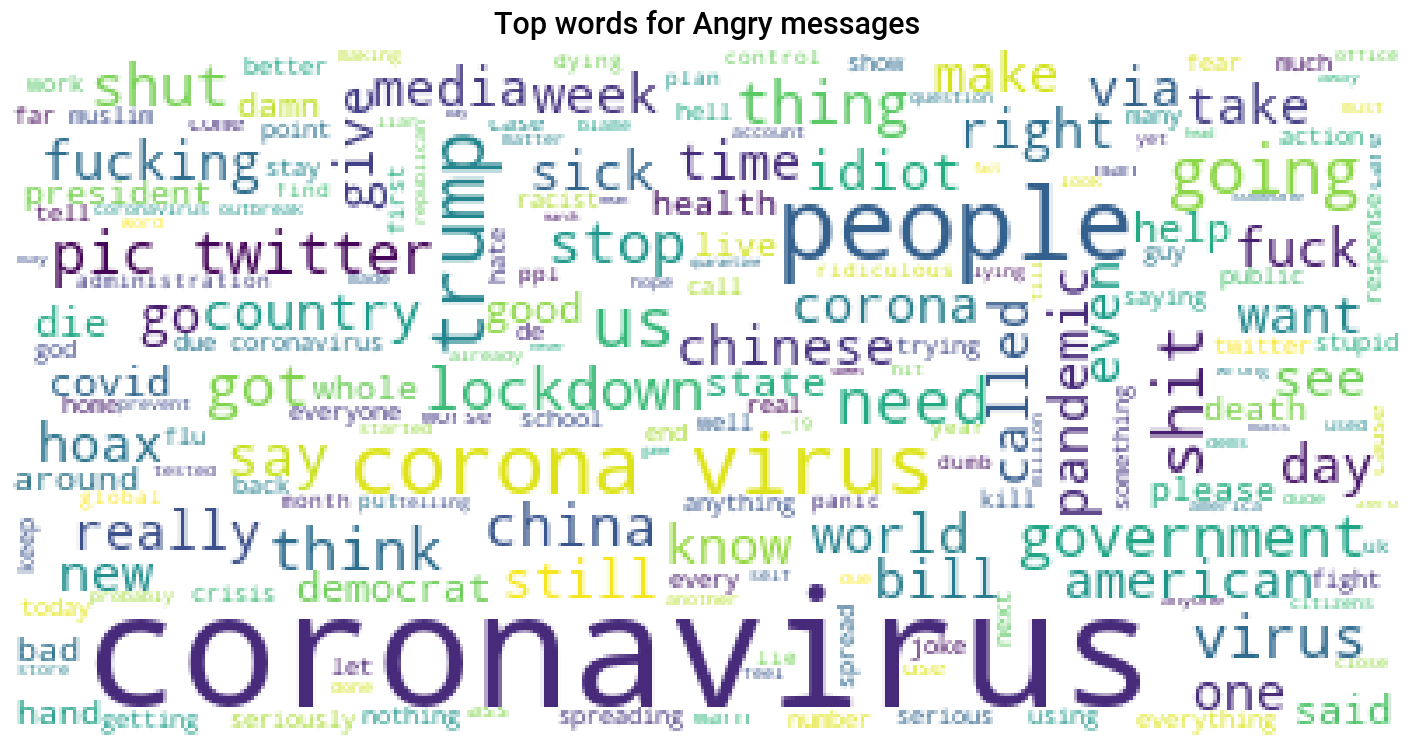

In [43]:
wc = WordCloud(
    background_color='white', 
    max_words=200, 
)
wc.generate(' '.join(text for text in df.loc[df['sentiment'] == 'anger', 'text']))
plt.figure(figsize=(18,10))
plt.title('Top words for Angry messages', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

### Vectorization

In [44]:
#Using Bag-of-words model
# 1. term frequency using countvectorizer

# how to define X and y (from the sentiment data) for use with COUNTVECTORIZER
x = df['text']
y = df['senti_encoded']

print(len(x), len(y))

3090 3090


In [45]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

2317 2317
773 773


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [47]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [48]:
vect_tunned = CountVectorizer(stop_words='english',
                              ngram_range=(1,2), min_df=0.1, 
                              max_df=0.7, max_features=100)

In [49]:
#tfidf for term-weighting


from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()

tfidf_transformer.fit(x_train_dtm)
x_train_tfidf = tfidf_transformer.transform(x_train_dtm)

x_train_tfidf

<2317x8861 sparse matrix of type '<class 'numpy.float64'>'
	with 32461 stored elements in Compressed Sparse Row format>

In [50]:
#tokenization: segmenting texts to words
texts = df['text']
target = df['senti_encoded']

In [51]:
 from keras.preprocessing.text import Tokenizer
# Calculate the length of our vocabulary
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(texts)

vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

Using TensorFlow backend.
C:\Users\saniy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\saniy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\saniy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\saniy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

10824

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.sequence import pad_sequences

In [53]:
from nltk.tokenize import word_tokenize

In [54]:
#import nltk
#nltk.download('punkt')

In [55]:
def embed(corpus): 
    return word_tokenizer.texts_to_sequences(corpus)

longest_train = max(texts, key=lambda sentence: len(word_tokenize(sentence)))
length_long_sentence = len(word_tokenize(longest_train))

train_padded_sentences = pad_sequences(
    embed(texts), 
    length_long_sentence, 
    padding='post'
)

train_padded_sentences

array([[  871,   192,    21, ...,     0,     0,     0],
       [   82,  1788,  4476, ...,     0,     0,     0],
       [  559,  4480,   967, ...,     0,     0,     0],
       ...,
       [10815,  1036,     4, ...,     0,     0,     0],
       [   42,   226,    14, ...,     0,     0,     0],
       [ 1340,   292, 10822, ...,     0,     0,     0]])

In [56]:
import numpy as np
embeddings_dictionary = dict()
embedding_dim = 100

# Load GloVe 100D embeddings
with open('glove.twitter.27B.100d.txt', encoding = "utf-8") as fp:
    for line in fp.readlines():
       
        records = line.split()
        word = records[0]
        vector_dimensions = np.asarray(records[1:], dtype=np.float32)
            
        
        embeddings_dictionary [word] = vector_dimensions

# embeddings_dictionary

In [57]:
embedding_matrix = np.zeros((vocab_length, embedding_dim))

for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
        
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.066068  ,  0.12279   , -1.13590002, ...,  1.02830005,
        -0.15395001,  0.54496002],
       [-1.34529996, -0.19508   ,  0.030726  , ..., -0.60955   ,
        -0.077404  ,  0.49627   ],
       ...,
       [ 0.36237001,  0.39456001, -0.22924   , ..., -0.28599   ,
         0.17466   ,  0.74822003],
       [-0.58087999, -0.01205   , -0.035472  , ..., -0.58776999,
        -0.34531   ,  0.2102    ],
       [-0.99422002, -0.55808997, -0.48117   , ...,  0.43055001,
        -0.34812999,  0.63963002]])

## LSTM

In [58]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Bidirectional

from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import GlobalMaxPool1D
from keras.layers import BatchNormalization

In [59]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    train_padded_sentences, 
    target, 
    test_size=0.25
)

In [60]:
def glove_lstm():
    model = Sequential()
    
    model.add(Embedding(
        input_dim=embedding_matrix.shape[0], 
        output_dim=embedding_matrix.shape[1], 
        weights = [embedding_matrix], 
        input_length=length_long_sentence
    ))
               
    model.add(Bidirectional(LSTM(
        length_long_sentence, 
        return_sequences = True, 
        recurrent_dropout=0.2
    )))
    
    model.add(GlobalMaxPool1D())
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(length_long_sentence, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

model = glove_lstm()
model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data = (X_test, y_test),
    verbose = 1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2317 samples, validate on 773 samples
Epoch 1/30
2317/2317 [==============================] - 8s 3ms/step - loss: -7.1028 - accuracy: 0.2542 - val_loss: -15.4550 - val_accuracy: 0.2561
Epoch 2/30
2317/2317 [==============================] - 6s 3ms/step - loss: -188.8874 - accuracy: 0.2611 - val_loss: -309.0202 - val_accuracy: 0.2561
Epoch 3/30
2317/2317 [==============================] - 6s 3ms/step - loss: -1182.8812 - accuracy: 0.2603 - val_loss: -1817.3279 - val_accuracy: 0.2561
Epoch 4/30
2317/2317 [==============================] - 6s 3ms/step - loss: -3729.5315 - accuracy: 0.2603 - val_loss: -5718.5991 - val_accuracy: 0.2561
Epoch 5/30
2317/2317 [==============================] - 6s 3ms/step - loss: -9039.5559 - accuracy: 0.2603 - val_loss: -11024.5182 - val_accuracy: 0.2561
Epoch 6/30
2317/2317 [==============================] - 6s 3ms/step - loss: -17931.0530 - accuracy: 0.26

KeyboardInterrupt: 